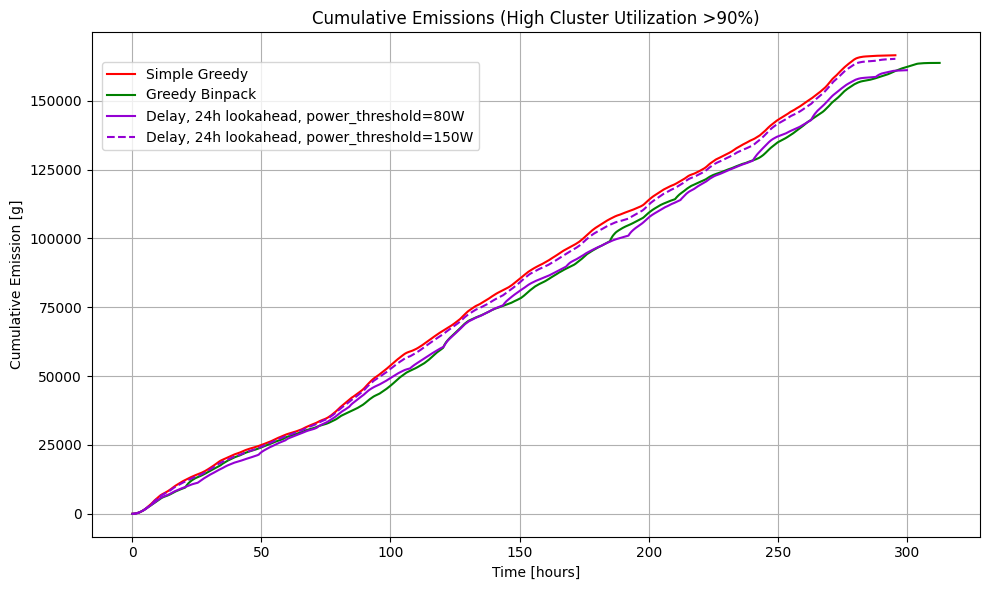

In [409]:
import pandas as pd
import matplotlib.pyplot as plt

dir = "../results/100_single"

# Load the data
#random_df_emission = pd.read_csv(dir + '/random/scheduler.csv')
#random_df_emission['hours'] = random_df_emission['tick'] / 3600
#random_df_emission['cumulative_emission'] = random_df_emission['cumulative_emission']

#random_df_utilization = pd.read_csv(dir + '/random/scheduler.csv')
#random_df_utilization['hours'] = random_df_utilization['tick'] / 3600
#random_df_utilization['utilization'] = random_df_utilization['utilization'] * 100

greedy_binpack_df_emission = pd.read_csv(dir + '/greedy_binpack/scheduler.csv')
greedy_binpack_df_emission['hours'] = greedy_binpack_df_emission['tick'] / 3600
greedy_binpack_df_emission['cumulative_emission'] = greedy_binpack_df_emission['cumulative_emission']

delay_150_df_emission = pd.read_csv(dir + '/delay_150/scheduler.csv')
delay_150_df_emission['hours'] = delay_150_df_emission['tick'] / 3600
delay_150_df_emission['cumulative_emission'] = delay_150_df_emission['cumulative_emission']

delay_80_df_emission = pd.read_csv(dir + '/delay_80/scheduler.csv')
delay_80_df_emission['hours'] = delay_80_df_emission['tick'] / 3600
delay_80_df_emission['cumulative_emission'] = delay_80_df_emission['cumulative_emission']

#delay_v2_df_emission = pd.read_csv(dir + '/delay_v2/scheduler.csv')
#delay_v2_df_emission['hours'] = delay_v2_df_emission['tick'] / 3600
#delay_v2_df_emission['cumulative_emission'] = delay_v2_df_emission['cumulative_emission']

#greedy2_binpack_df_emission = pd.read_csv(dir + '/greedy_binpack2/scheduler.csv')
#greedy2_binpack_df_emission['hours'] = greedy2_binpack_df_emission['tick'] / 3600
#greedy2_binpack_df_emission['cumulative_emission'] = greedy2_binpack_df_emission['cumulative_emission']

#greedy_binpack_df_utilization = pd.read_csv(dir + '/greedy_binpack/scheduler.csv')
#greedy_binpack_df_utilization['hours'] = greedy_binpack_df_utilization['tick'] / 3600
#greedy_binpack_df_utilization['utilization'] = greedy_binpack_df_utilization['utilization'] * 100

greedy_df_emission = pd.read_csv(dir + '/greedy/scheduler.csv')
greedy_df_emission['hours'] = greedy_df_emission['tick'] / 3600
greedy_df_emission['cumulative_emission'] = greedy_df_emission['cumulative_emission']


#greedy_df_utilization = pd.read_csv(dir + '/greedy/scheduler.csv')
#greedy_df_utilization['hours'] = greedy_df_utilization['tick'] / 3600
#greedy_df_utilization['utilization'] = greedy_df_utilization['utilization'] * 100

#timepool_df_emission = pd.read_csv(dir + '/timepool/scheduler.csv')
#timepool_df_emission['hours'] = timepool_df_emission['tick'] / 3600
#timepool_df_emission['cumulative_emission'] = timepool_df_emission['cumulative_emission']

#timepool2_df_emission = pd.read_csv(dir + '/timepool2/scheduler.csv')
#timepool2_df_emission['hours'] = timepool2_df_emission['tick'] / 3600
#timepool2_df_emission['cumulative_emission'] = timepool2_df_emission['cumulative_emission']

#genetic_timepool_long_df_emission = pd.read_csv(dir + '/genetic_timepool_long/scheduler.csv')
#genetic_timepool_long_df_emission['hours'] = genetic_timepool_long_df_emission['tick'] / 3600
#genetic_timepool_long_df_emission['cumulative_emission'] = genetic_timepool_long_df_emission['cumulative_emission']

#genetic_timepool_df_emission = pd.read_csv(dir + '/genetic_timepool/scheduler.csv')
#genetic_timepool_df_emission['hours'] = genetic_timepool_df_emission['tick'] / 3600
#genetic_timepool_df_emission['cumulative_emission'] = genetic_timepool_df_emission['cumulative_emission']

#pool_df_emission_mean = pd.read_csv(dir + '/pool_mean_pow/scheduler.csv')
#pool_df_emission_mean['hours'] = pool_df_emission_mean['tick'] / 3600
#pool_df_emission_mean['utilization'] = pool_df_emission_mean['utilization'] * 100

#pool_df_emission_median = pd.read_csv(dir + '/pool_median_pow/scheduler.csv')
#pool_df_emission_median['hours'] = pool_df_emission_median['tick'] / 3600
#pool_df_emission_median['utilization'] = pool_df_emission_median['utilization'] * 100

#pool_df_emission_energy = pd.read_csv(dir + '/pool_energy/scheduler.csv')
#pool_df_emission_energy['hours'] = pool_df_emission_energy['tick'] / 3600
#pool_df_emission_energy['utilization'] = pool_df_emission_energy['utilization'] * 100

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot cumulative emissions on the primary y-axis
#ax1.plot(random_df_emission['hours'], random_df_emission['cumulative_emission'], label='Random', color='blue')

ax1.plot(greedy_df_emission['hours'], greedy_df_emission['cumulative_emission'], label='Simple Greedy', color='red')
ax1.plot(greedy_binpack_df_emission['hours'], greedy_binpack_df_emission['cumulative_emission'], label='Greedy Binpack', color='green')
ax1.plot(delay_80_df_emission['hours'], delay_80_df_emission['cumulative_emission'], label='Delay, 24h lookahead, power_threshold=80W', color='darkviolet', linestyle='solid')
ax1.plot(delay_150_df_emission['hours'], delay_150_df_emission['cumulative_emission'], label='Delay, 24h lookahead, power_threshold=150W', color='darkviolet', linestyle='dashed')



#ax1.plot(df11['hours'], df11['cumulative_emission'], label='Pool, Size=50, KnownPowerConsumption', color='black', linestyle='dashdot')
#ax1.plot(df13['hours'], df13['cumulative_emission'], label='Pool, Size=200, KnownPowerConsumption', color='black', linestyle='dotted')
#ax1.plot(df15['hours'], df15['cumulative_emission'], label='Pool, Size=50, KnownPowerMedian', color='darkviolet', linestyle='solid')
#ax1.plot(df17['hours'], df17['cumulative_emission'], label='Pool, Size=50, KnownPowerMean', color='peru', linestyle='solid')
#ax1.plot(df19['hours'], df19['cumulative_emission'], label='Pool, Size=50, KnownPowerConsumption/KnownTotalLength', color='yellowgreen', linestyle='solid')
#ax1.plot(df21['hours'], df21['cumulative_emission'], label='TimePool', color='yellowgreen', linestyle='solid')
ax1.set_xlabel('Time [hours]')
ax1.set_ylabel('Cumulative Emission [g]', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Add the secondary y-axis for utilization
#ax2 = ax1.twinx()
#ax2.plot(df2['hours'], df2['utilization'], label='Random - Utilization', color='blue', linestyle='dashed')
#ax2.plot(df4['hours'], df4['utilization'], label='Lookahead - Utilization', color='green', linestyle='dashed')
#ax2.plot(df6['hours'], df6['utilization'], label='Greedy - Utilization', color='red', linestyle='dashed')
#ax2.plot(df8['hours'], df8['utilization'], label='Pool - Utilization', color='red', linestyle='dashed')
#ax2.set_ylabel('Utilization [%]', color='black')
#ax2.tick_params(axis='y', labelcolor='black')

# Add legends for both axes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
ax1.grid(True)

#plt.xlim(230, 314)
#plt.ylim(100000, 200000)

#plt.xlim(0, 1)

# Add a title 
plt.title('Cumulative Emissions (High Cluster Utilization >90%)')

# Show the plot
plt.tight_layout()
#plt.yscale('log')
plt.show()

# 307 hours total run time greedy binpack, and 295 hours greedy


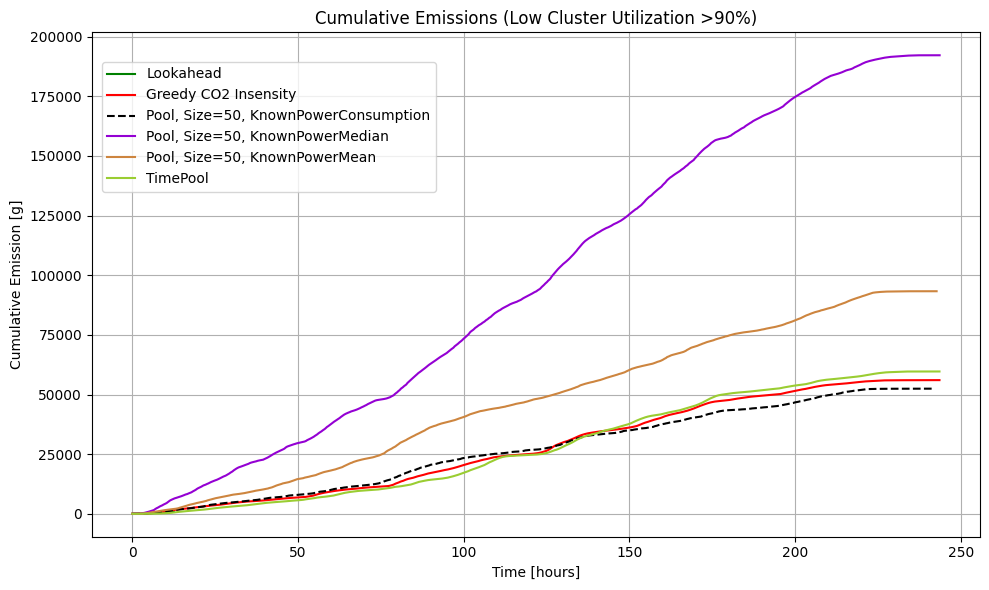

In [295]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
#df1 = pd.read_csv('../results/random/scheduler.csv')
#df1['hours'] = df1['tick'] / 3600
#df1['cumulative_emission'] = df1['cumulative_emission']

#df2 = pd.read_csv('../results/random/scheduler.csv')
#df2['hours'] = df2['tick'] / 3600
#df2['utilization'] = df2['utilization'] * 100

df3 = pd.read_csv('../results/lookahead/scheduler.csv')
df3['hours'] = df3['tick'] / 3600
df3['cumulative_emission'] = df3['cumulative_emission']

df4 = pd.read_csv('../results/lookahead/scheduler.csv')
df4['hours'] = df4['tick'] / 3600
df4['utilization'] = df4['utilization'] * 100

df5 = pd.read_csv('../results/greedy/scheduler.csv')
df5['hours'] = df5['tick'] / 3600
df5['cumulative_emission'] = df5['cumulative_emission']

df6 = pd.read_csv('../results/greedy/scheduler.csv')
df6['hours'] = df6['tick'] / 3600
df6['utilization'] = df6['utilization'] * 100

#df7 = pd.read_csv('../results/pool_10/scheduler.csv')
#df7['hours'] = df7['tick'] / 3600
#df7['cumulative_emission'] = df7['cumulative_emission']

#df8 = pd.read_csv('../results/pool_10/scheduler.csv')
#df8['hours'] = df8['tick'] / 3600
#df8['utilization'] = df8['utilization'] * 100

df9 = pd.read_csv('../results/pool_50/scheduler.csv')
df9['hours'] = df9['tick'] / 3600
df9['cumulative_emission'] = df9['cumulative_emission']

df10 = pd.read_csv('../results/pool_50/scheduler.csv')
df10['hours'] = df10['tick'] / 3600
df10['utilization'] = df10['utilization'] * 100

#df11 = pd.read_csv('../results/pool_100/scheduler.csv')
#df11['hours'] = df11['tick'] / 3600
#df11['cumulative_emission'] = df11['cumulative_emission']

#df12 = pd.read_csv('../results/pool_100/scheduler.csv')
#df12['hours'] = df12['tick'] / 3600
#df12['utilization'] = df12['utilization'] * 100

#df13 = pd.read_csv('../results/pool_200/scheduler.csv')
#df13['hours'] = df13['tick'] / 3600
#df13['cumulative_emission'] = df13['cumulative_emission']

#df14 = pd.read_csv('../results/pool_200/scheduler.csv')
#df14['hours'] = df14['tick'] / 3600
#df14['utilization'] = df14['utilization'] * 100

#df15 = pd.read_csv('../results/pool/scheduler.csv')
#df15['hours'] = df15['tick'] / 3600
#df15['cumulative_emission'] = df15['cumulative_emission']

#df16 = pd.read_csv('../results/pool_50_median/scheduler.csv')
#df16['hours'] = df16['tick'] / 3600
#df16['utilization'] = df16['utilization'] * 100

#df17 = pd.read_csv('../results/pool_50_mean/scheduler.csv')
#df17['hours'] = df17['tick'] / 3600
#df17['cumulative_emission'] = df17['cumulative_emission']

#df18 = pd.read_csv('../results/pool_50_mean/scheduler.csv')
#df18['hours'] = df18['tick'] / 3600
#df18['utilization'] = df18['utilization'] * 100

#df19 = pd.read_csv('../results/pool/scheduler.csv')
#df19['hours'] = df19['tick'] / 3600
#df19['cumulative_emission'] = df19['cumulative_emission']

#df20 = pd.read_csv('../results/pool/scheduler.csv')
#df20['hours'] = df20['tick'] / 3600
#df20['utilization'] = df20['utilization'] * 100

#df21 = pd.read_csv('../results/timepool/scheduler.csv')
#df21['hours'] = df21['tick'] / 3600
#df21['cumulative_emission'] = df21['cumulative_emission']

#df22 = pd.read_csv('../results/timepool/scheduler.csv')
#df22['hours'] = df22['tick'] / 3600
#df22['utilization'] = df20['utilization'] * 100


# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot cumulative emissions on the primary y-axis
#ax1.plot(df1['hours'], df1['cumulative_emission'], label='Random', color='blue')
ax1.plot(df3['hours'], df3['cumulative_emission'], label='Lookahead', color='green')
ax1.plot(df5['hours'], df5['cumulative_emission'], label='Greedy CO2 Insensity', color='red')
#ax1.plot(df7['hours'], df7['cumulative_emission'], label='Pool, Size=10, KnownPowerConsumption', color='black')
ax1.plot(df9['hours'], df9['cumulative_emission'], label='Pool, Size=50, KnownPowerConsumption', color='black', linestyle='dashed')
#ax1.plot(df11['hours'], df11['cumulative_emission'], label='Pool, Size=100, KnownPowerConsumption', color='black', linestyle='dashdot')
#ax1.plot(df13['hours'], df13['cumulative_emission'], label='Pool, Size=200, KnownPowerConsumption', color='black', linestyle='dotted')
ax1.plot(df15['hours'], df15['cumulative_emission'], label='Pool, Size=50, KnownPowerMedian', color='darkviolet', linestyle='solid')
ax1.plot(df17['hours'], df17['cumulative_emission'], label='Pool, Size=50, KnownPowerMean', color='peru', linestyle='solid')
#ax1.plot(df19['hours'], df19['cumulative_emission'], label='Pool, Size=50, KnownPowerConsumption/KnownTotalLength', color='yellowgreen', linestyle='solid')
ax1.plot(df21['hours'], df21['cumulative_emission'], label='TimePool', color='yellowgreen', linestyle='solid')
ax1.set_xlabel('Time [hours]')
ax1.set_ylabel('Cumulative Emission [g]', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Add the secondary y-axis for utilization
#ax2 = ax1.twinx()
#ax2.plot(df2['hours'], df2['utilization'], label='Random - Utilization', color='blue', linestyle='dashed')
#ax2.plot(df4['hours'], df4['utilization'], label='Lookahead - Utilization', color='green', linestyle='dashed')
#ax2.plot(df6['hours'], df6['utilization'], label='Greedy - Utilization', color='red', linestyle='dashed')
#ax2.plot(df8['hours'], df8['utilization'], label='Pool - Utilization', color='red', linestyle='dashed')
#ax2.set_ylabel('Utilization [%]', color='black')
#ax2.tick_params(axis='y', labelcolor='black')

# Add legends for both axes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
ax1.grid(True)

# Add a title
plt.title('Cumulative Emissions (Low Cluster Utilization >90%)')

# Show the plot
plt.tight_layout()
#plt.yscale('log')
plt.show()

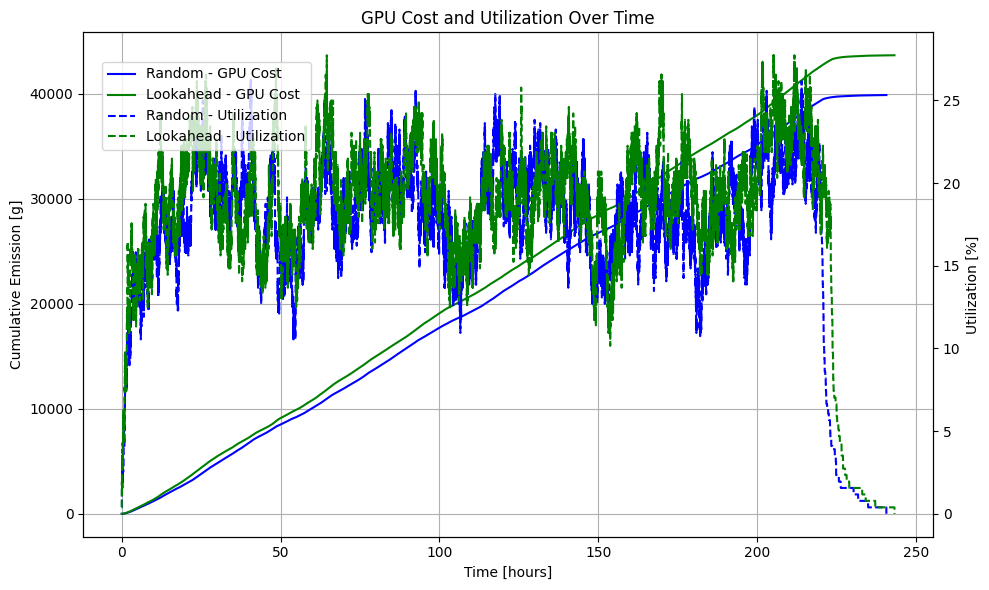

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df1 = pd.read_csv('../results/random2/scheduler.csv')
df1['hours'] = df1['tick'] / 3600
df1['total_gpu_cost'] = df1['total_gpu_cost']

df2 = pd.read_csv('../results/random2/scheduler.csv')
df2['hours'] = df2['tick'] / 3600
df2['utilization'] = df2['utilization'] * 100

df3 = pd.read_csv('../results/lookahead2/scheduler.csv')
df3['hours'] = df3['tick'] / 3600
df3['total_gpu_cost'] = df3['total_gpu_cost']

df4 = pd.read_csv('../results/lookahead2/scheduler.csv')
df4['hours'] = df4['tick'] / 3600
df4['utilization'] = df4['utilization'] * 100

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot cumulative emissions on the primary y-axis
ax1.plot(df1['hours'], df1['total_gpu_cost'], label='Random - GPU Cost', color='blue')
ax1.plot(df3['hours'], df3['total_gpu_cost'], label='Lookahead - GPU Cost', color='green')
ax1.set_xlabel('Time [hours]')
ax1.set_ylabel('Cumulative Emission [g]', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Add the secondary y-axis for utilization
ax2 = ax1.twinx()
ax2.plot(df2['hours'], df2['utilization'], label='Random - Utilization', color='blue', linestyle='dashed')
ax2.plot(df4['hours'], df4['utilization'], label='Lookahead - Utilization', color='green', linestyle='dashed')
ax2.set_ylabel('Utilization [%]', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add legends for both axes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
ax1.grid(True)

# Add a title
plt.title('GPU Cost and Utilization Over Time')

# Show the plot
plt.tight_layout()
plt.show()
